### Métodos Ensemble:

Os métodos ensemble são abordagens que combinam várias previsões de diferentes modelos de aprendizado de máquina para produzir uma previsão mais robusta e geralmente mais precisa. Eles são baseados no princípio de que a combinação de vários modelos pode compensar as fraquezas individuais de cada modelo.

Existem dois tipos principais de métodos ensemble:

1. **Bagging (Bootstrap Aggregating)**:
   - Bagging envolve a geração de múltiplos conjuntos de dados de treinamento por meio de reamostragem com substituição (bootstrap).
   - Cada conjunto de dados é usado para treinar um modelo diferente.
   - As previsões de cada modelo são então combinadas (geralmente por média ou voto majoritário) para formar uma previsão final.

2. **Boosting**:
   - Boosting é uma abordagem iterativa na qual os modelos são construídos sequencialmente.
   - Cada modelo subsequentemente treinado se concentra nos erros cometidos pelos modelos anteriores.
   - No final, todos os modelos são combinados ponderadamente para formar uma previsão final.

### Floresta Aleatória:

A Floresta Aleatória é um exemplo proeminente de um método ensemble baseado em bagging. Aqui está como funciona:

- **Construção de Árvores de Decisão**:
   - A Floresta Aleatória constrói um grande número de árvores de decisão durante o treinamento.
   - Cada árvore é treinada em um subconjunto aleatório do conjunto de dados de treinamento.
   - Além disso, em cada divisão de nó, apenas um subconjunto aleatório de recursos é considerado para divisão.

- **Combinação de Previsões**:
   - Uma vez que todas as árvores são treinadas, as previsões de cada árvore são combinadas.
   - Para problemas de classificação, a previsão final pode ser a classe mais frequentemente prevista (voto majoritário).
   - Para problemas de regressão, a previsão final pode ser a média das previsões de todas as árvores.

### Vantagens da Floresta Aleatória:

- Pode lidar com problemas de classificação e regressão.
- Menos propenso a overfitting do que uma única árvore de decisão.
- Eficiente para conjuntos de dados grandes.
- Capaz de lidar com dados categóricos e numéricos sem a necessidade de pré-processamento extensivo.

### Limitações:

- Pode ser lento para fazer previsões em comparação com métodos mais simples.
- Não é tão fácil de interpretar como uma única árvore de decisão.
- Requer ajuste de hiperparâmetros para obter o melhor desempenho.


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

from sklearn.datasets import load_breast_cancer
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dados = load_breast_cancer()

x_can = pd.DataFrame(dados.data, columns= [dados.feature_names])
y_can = pd.Series(dados.target)

y_can.value_counts() # Dados bem balanceados

1    357
0    212
Name: count, dtype: int64

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Criando modelo
modelo = RandomForestClassifier(n_estimators=50)
kfold = StratifiedKFold(n_splits=5)

resultado = cross_val_score(modelo, x_can, y_can, cv=kfold)
print(round(resultado.mean(),2))


0.96


### Cidades Brasileiras

Este conjunto de dados é uma compilação de várias informações publicamente disponíveis sobre municípios brasileiros.

Nosso objetivo é prever o IDH com base em algumas características, essas que terão redução de dimensionalidade usando a técnica de PCA.

In [3]:
cities = pd.read_csv('BRAZIL_CITIES.csv',sep = ';')

cities.drop(['CITY', 'IDHM Ranking 2010', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao', 'LONG', 'LAT',
              'GVA_MAIN', 'REGIAO_TUR', 'MUN_EXPENDIT', 'HOTELS', 'BEDS', 'Pr_Agencies', 'Pu_Agencies',
            'Pr_Bank', 'Pu_Bank', 'Pr_Assets', 'Pu_Assets','UBER','MAC','WAL-MART'], 
                axis=1, inplace=True)

percen_faltantes = round((cities.isnull().sum() / cities.shape[0] )*100, 2)
percen_faltantes

# Preenchendo dados faltantes pela mediana, performa melhor caso tenha outliers
numeric_columns = cities.select_dtypes(include=['number']).columns

cities[numeric_columns].fillna(cities[numeric_columns].median(), inplace= True ) 

# Hot Encode
cities_encode = pd.get_dummies(cities['STATE']).astype(int)
concat = pd.concat([cities,cities_encode], axis=1)

y_cities = concat['IDHM']
x_cities = concat.drop(columns=['IDHM','STATE'])
##float_columns = cities.select_dtypes(exclude=['object'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalizando as variaveis
#normalizador = MinMaxScaler(feature_range=(0,1))
#x_norm = normalizador.fit_transform(x_cities)

#PCA
#pca = PCA(n_components=15)
#x_pca = pca.fit_transform(x_norm)

In [31]:
x_cities.select_dtypes(exclude=['number']).columns

Index(['AREA', 'CATEGORIA_TUR', 'RURAL_URBAN'], dtype='object')

Variância Explicada pelos Componentes [0.4671249  0.2253863  0.10560262 0.053758   0.04623853 0.03141704
 0.02571553 0.01412064 0.00692576 0.00627492 0.00439313 0.00287271
 0.00190585 0.00185219 0.00144781]


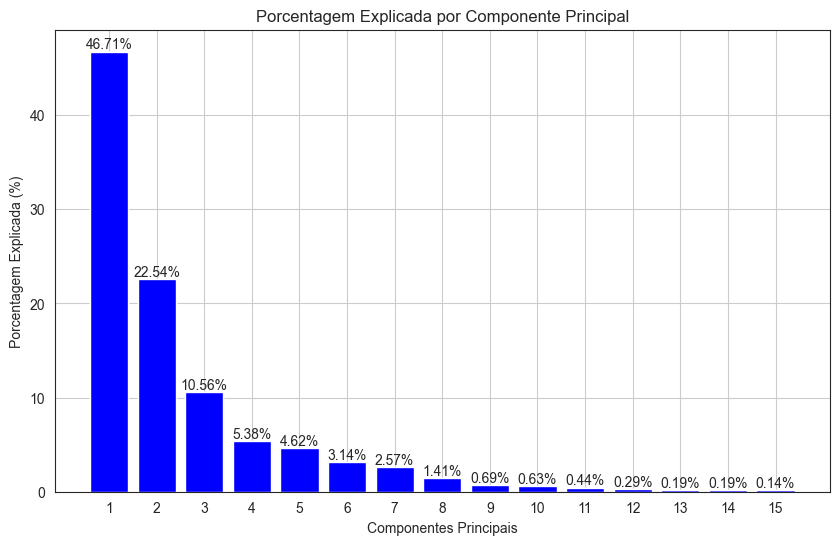

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Variância Explicada pelos Componentes", pca.explained_variance_ratio_)

# Obtendo a porcentagem explicada dos componentes principais
porcentagens_explicadas = pca.explained_variance_ratio_

# Índices dos componentes principais
indices = np.arange(len(porcentagens_explicadas)) + 1

# Plotagem do gráfico de barras
sns.set_style("white")  # Definindo o estilo do seaborn
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura
barras = plt.bar(indices, porcentagens_explicadas * 100, color='blue')

# Adicionando os rótulos dos dados acima das barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{porcentagens_explicadas[i]*100:.2f}%', ha='center', va='bottom')

# Plotagem do gráfico de barras
plt.bar(indices, porcentagens_explicadas * 100, color='blue')
plt.xlabel('Componentes Principais')
plt.ylabel('Porcentagem Explicada (%)')
plt.title('Porcentagem Explicada por Componente Principal')
plt.xticks(indices)
plt.grid(True)
plt.show()